In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Loading the dataset
data = pd.read_csv('iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#preprocessing
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

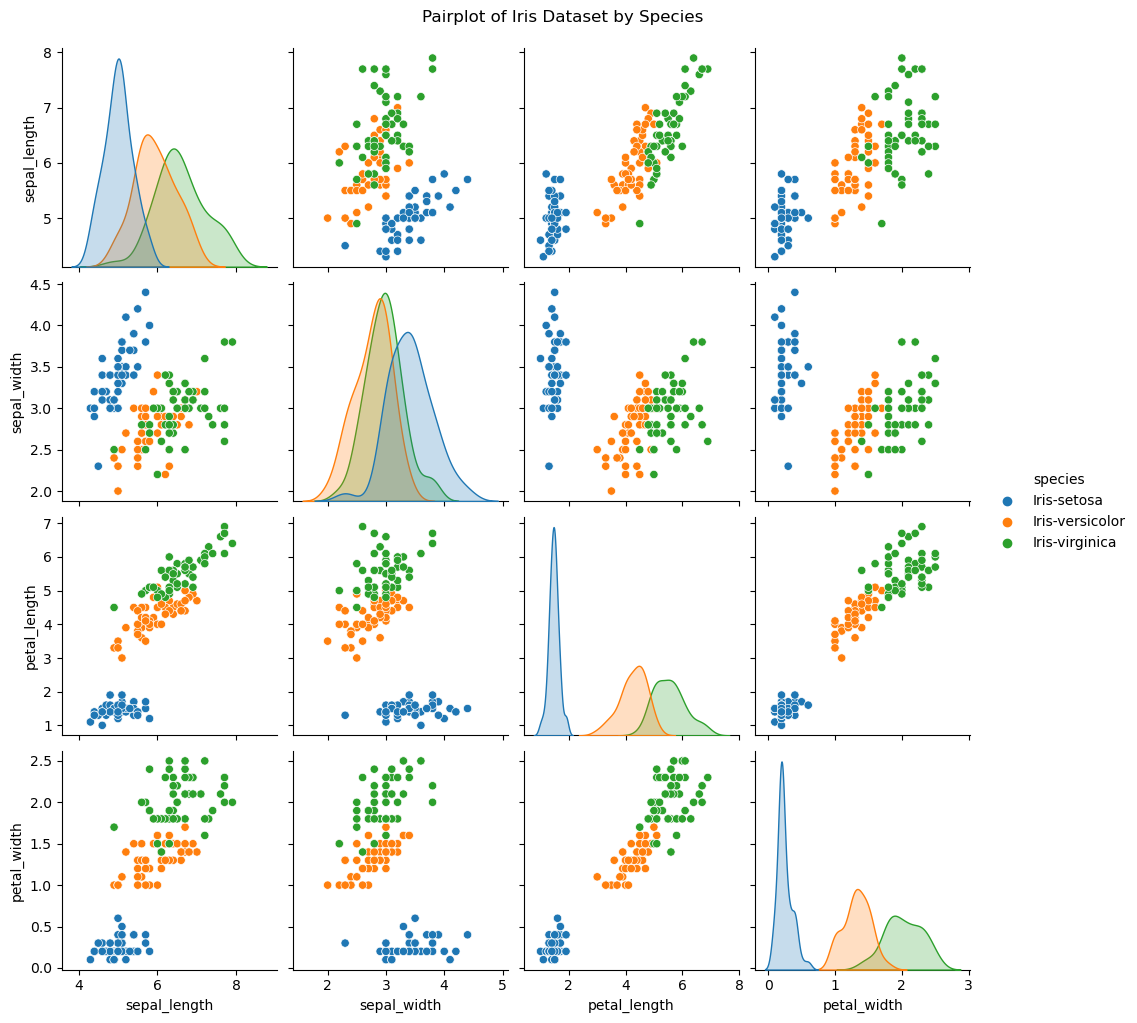

In [6]:
#Pairplot
sns.pairplot(data, hue='species', diag_kind='kde')
plt.suptitle('Pairplot of Iris Dataset by Species', y=1.02)
plt.show()

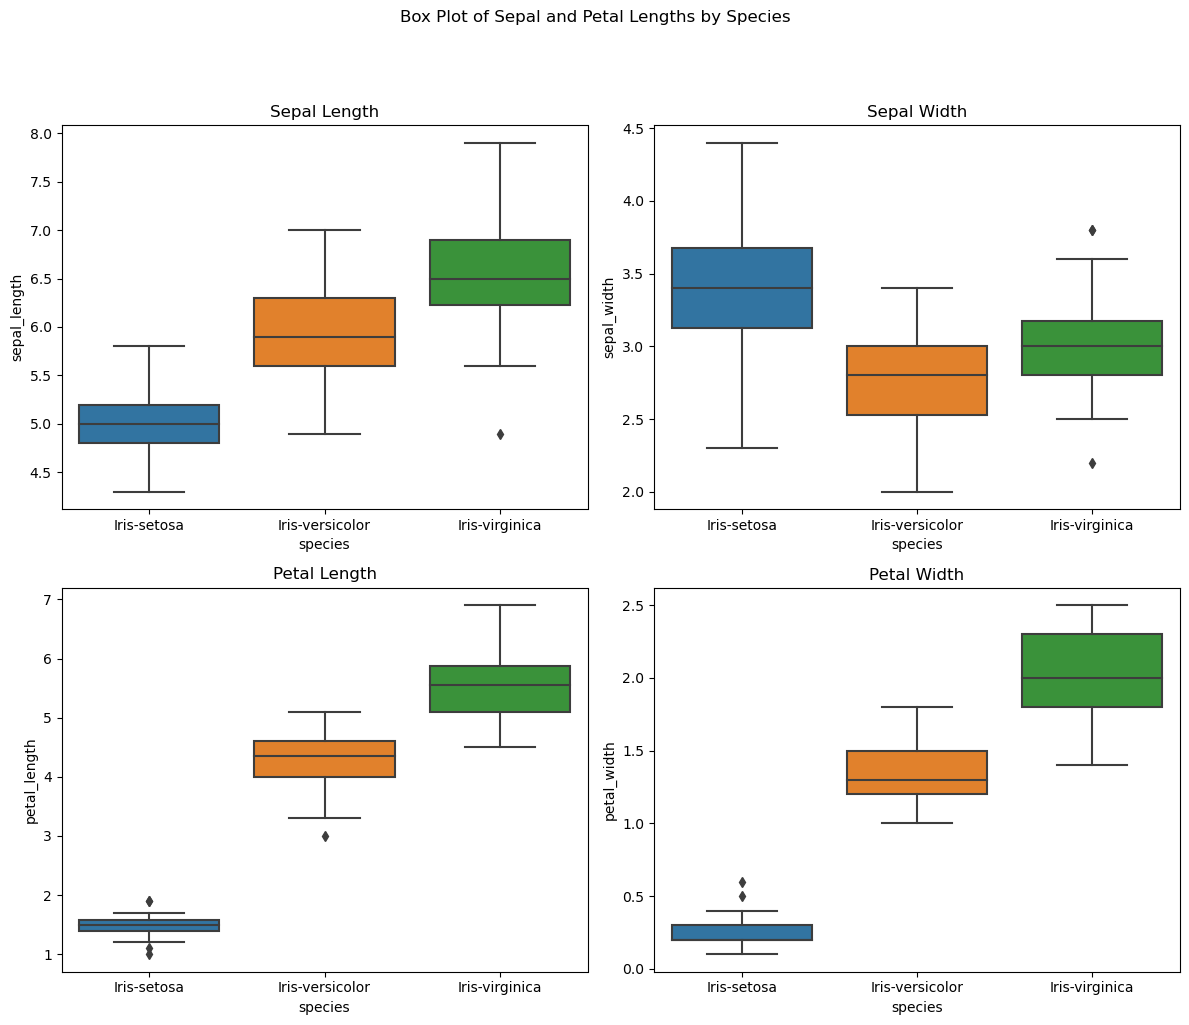

In [7]:
#Boxplot 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Box Plot of Sepal and Petal Lengths by Species', y=1.02)

sns.boxplot(x='species', y='sepal_length', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.boxplot(x='species', y='sepal_width', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.boxplot(x='species', y='petal_length', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.boxplot(x='species', y='petal_width', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

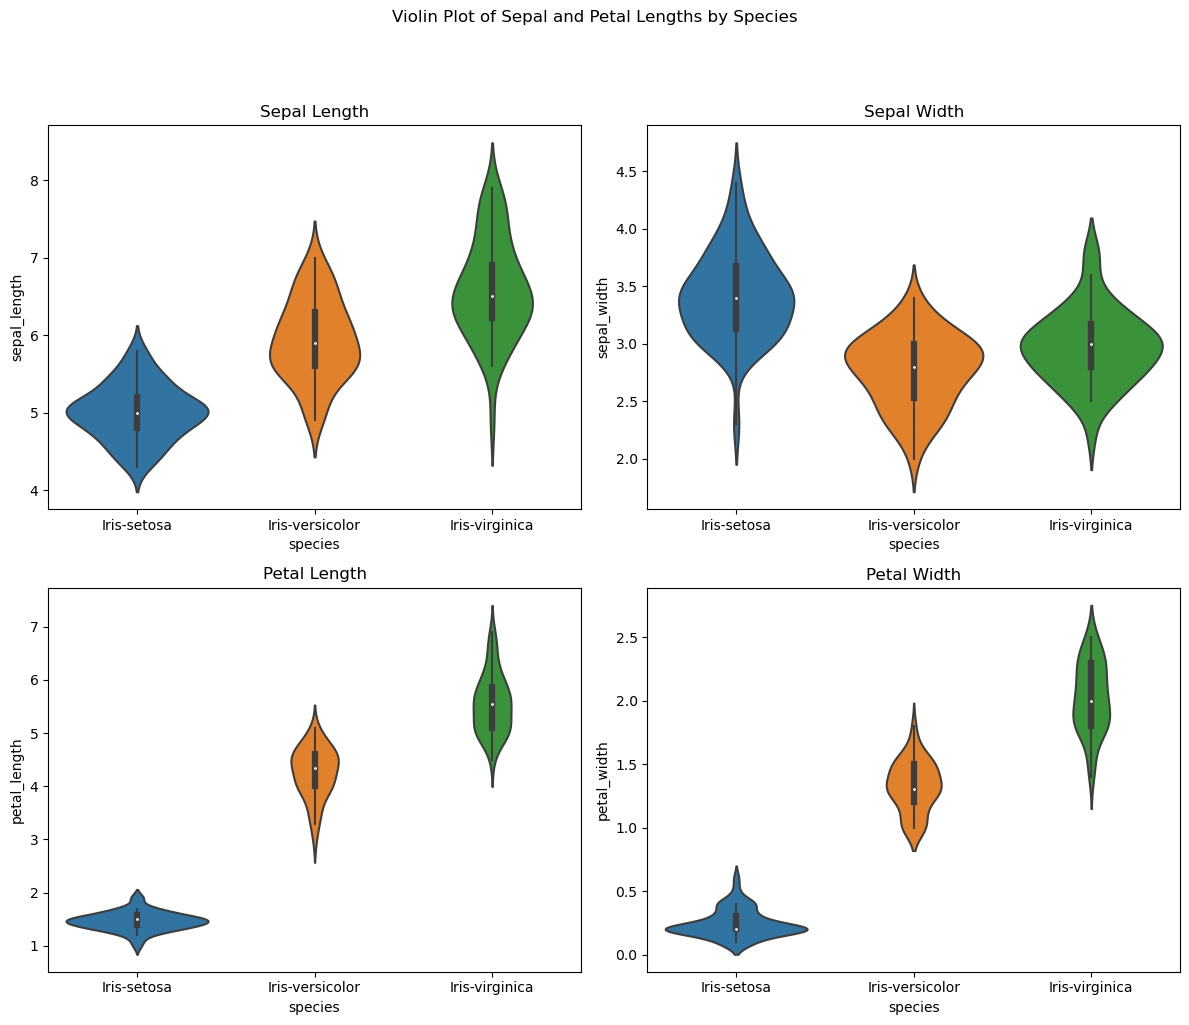

In [8]:
#Violinplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Violin Plot of Sepal and Petal Lengths by Species', y=1.02)

sns.violinplot(x='species', y='sepal_length', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.violinplot(x='species', y='sepal_width', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.violinplot(x='species', y='petal_length', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.violinplot(x='species', y='petal_width', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
#Modelevaluation
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
import numpy as np
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
prediction = classifier.predict(X_new)
print("Prediction of Species for X_new:")
for i in range(len(X_new)):
    print(f"Input {i+1}: {X_new[i]} => Predicted Species: {prediction[i]}")

Prediction of Species for X_new:
Input 1: [3.  2.  1.  0.2] => Predicted Species: Iris-setosa
Input 2: [4.9 2.2 3.8 1.1] => Predicted Species: Iris-versicolor
Input 3: [5.3 2.5 4.6 1.9] => Predicted Species: Iris-virginica


/Users/vidya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
